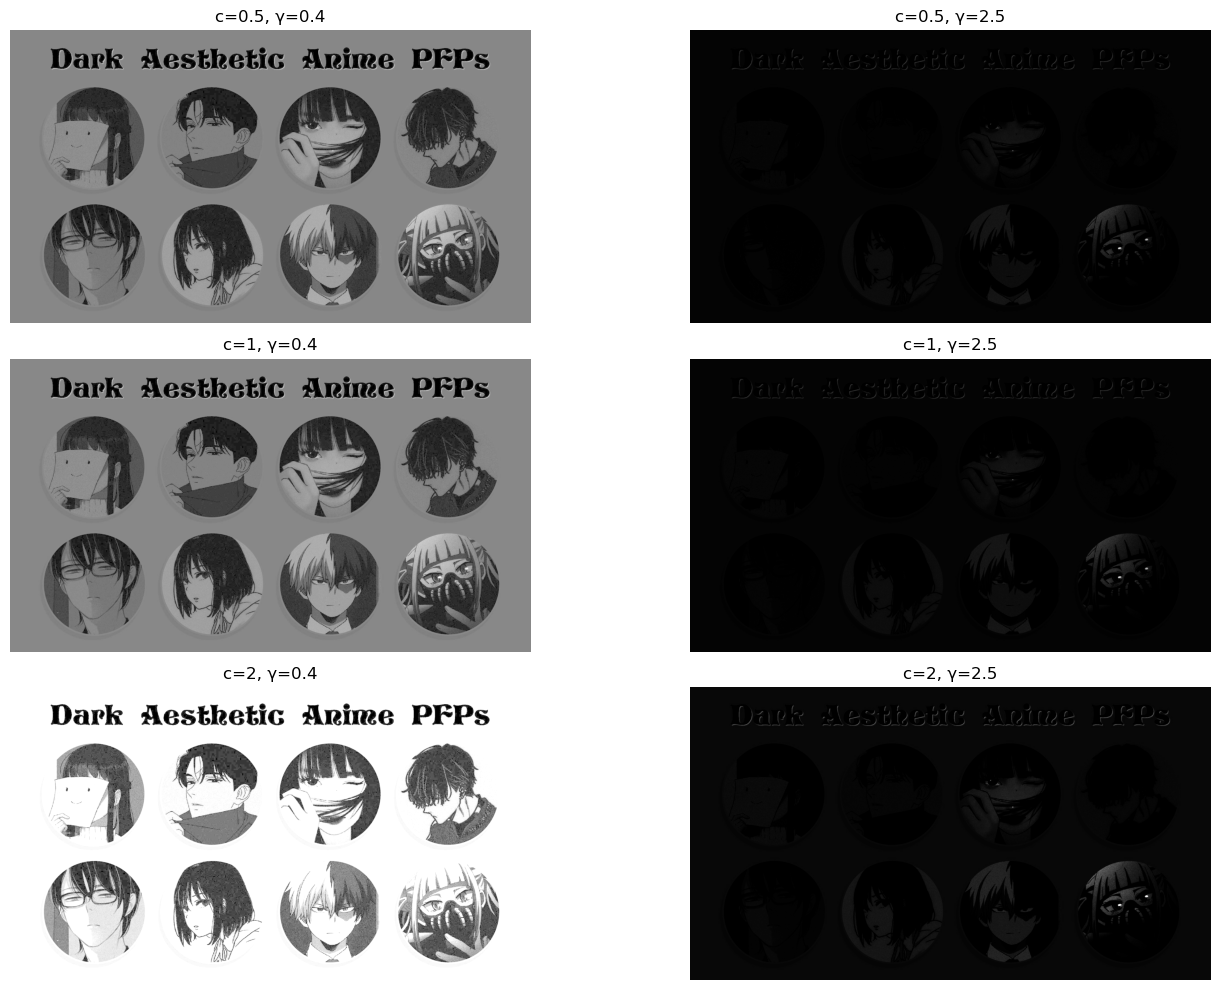

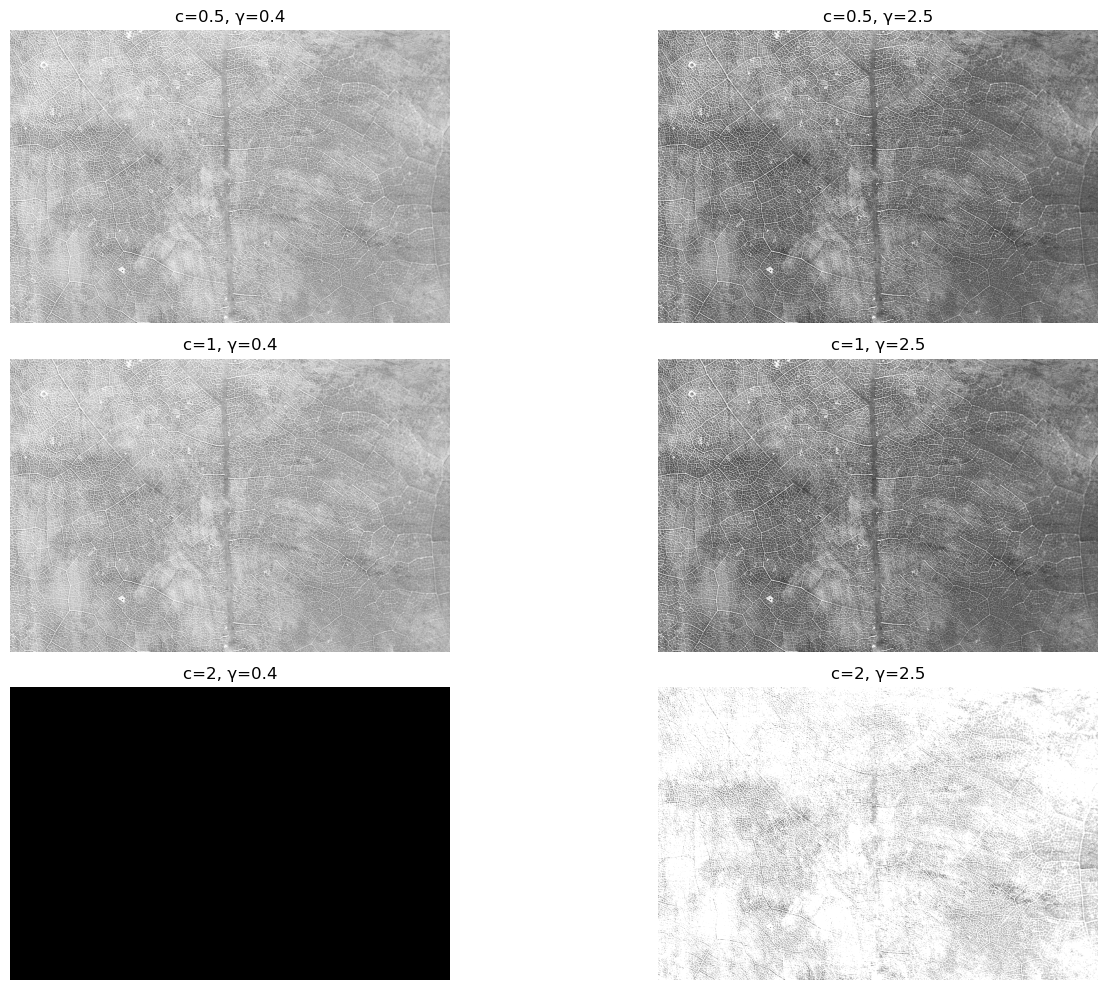

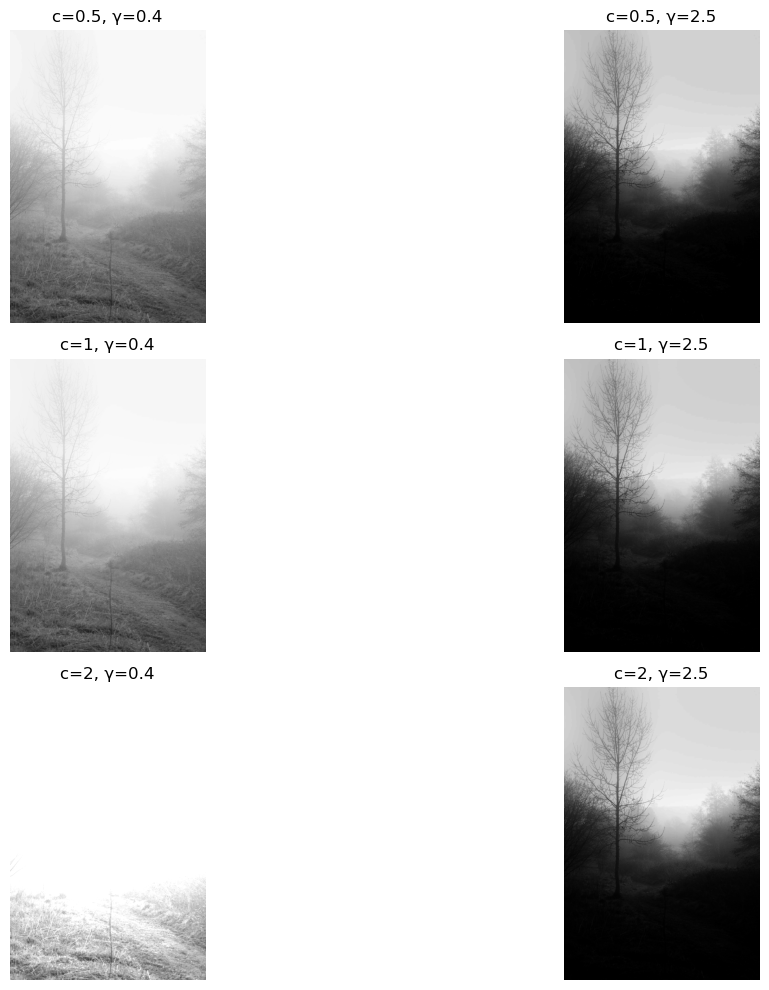

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def power_law_transformation(img, c, gamma):
    # Normalize the image to [0, 1] for the power-law transformation
    img_normalized = img / 255.0
    transformed = c * np.power(img_normalized, gamma)
    # Scale back to [0, 255]
    transformed = np.clip(transformed * 255, 0, 255).astype(np.uint8)
    return transformed

def process_display_and_save_image(image_path, output_folder):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Error: Couldn't load the image {image_path}.")
        return

    constants = [0.5, 1, 2]
    gammas = [0.4, 2.5]

    # Display in Jupyter Notebook
    plt.figure(figsize=(15, 10))
    idx = 1

    for c in constants:
        for gamma in gammas:
            enhanced_img = power_law_transformation(img, c, gamma)
            
            plt.subplot(len(constants), len(gammas), idx)
            plt.imshow(enhanced_img, cmap='gray')
            plt.title(f'c={c}, γ={gamma}')
            plt.axis('off')

            # Save the enhanced image
            base_name = os.path.basename(image_path)
            file_name_without_extension = os.path.splitext(base_name)[0]
            new_file_name = f"{file_name_without_extension}_c{c}_gamma{gamma}.jpg"
            
            output_path = os.path.join(output_folder, new_file_name)
            cv2.imwrite(output_path, enhanced_img)

            idx += 1

    plt.tight_layout()
    plt.show()

# Ensure the output folder exists, if not create it
output_folder = "power_law_transformed"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

image_list = ["../original_images/cartoon.jpg","../original_images/scenery1.jpg","../original_images/scenery2.jpg"]

for image in image_list:
    process_display_and_save_image(image, output_folder)
